In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [41]:
df = pd.read_csv(open(u'../output/calibration/1/niğde.csv', 'rb'))
df['sample_id'] = list(range(1,df.shape[0]+1))

N_values = pd.read_excel(open(u'../output/calibration/1/niğde.xlsx', 'rb'))['% Azot'].values
df['%N'] = N_values

In [46]:
df.columns

Index(['C 1 @ 279.408', 'C 1 @ 279.482', 'C 2 @ 280.146', 'C 3 @ 285.075',
       'C 3 @ 285.149', 'K 1 @ 460.714', 'K 1 @ 460.716', 'K 2 @ 553.656',
       'K 3 @ 280.146', 'N 1 @ 589.024', 'N 1 @ 589.116', 'N 2 @ 279.482',
       'N 3 @ 334.762', 'N 4 @ 421.624', 'N 5 @ 443.506', 'N 5 @ 443.613',
       'P 1 @ 334.762', 'P 1 @ 334.83', 'P 2 @ 553.656', 'P 3 @ 317.881',
       'P 4 @ 407.871', 'sample_id', '%N'],
      dtype='object')

In [44]:
class CalibrationColumn:
    """

        Args:
            colname(str):

    """
    def __init__(self, colname):

        parts = colname.split(' ')
        self.raw_name = parts[0]
        self.name = parts[0].lower()
        self.id = int(parts[1])
        self.nm = float(parts[-1])

    def __str__(self):
        return '{el} {id} @ {nm}'.format(el=self.raw_name,
                                         id=self.id,
                                         nm=self.nm)
    
    def __repr__(self):
        return self.__str__()

In [47]:
elements = [CalibrationColumn(colname) for colname in df.columns[:-2]]
elements


[C 1 @ 279.408,
 C 1 @ 279.482,
 C 2 @ 280.146,
 C 3 @ 285.075,
 C 3 @ 285.149,
 K 1 @ 460.714,
 K 1 @ 460.716,
 K 2 @ 553.656,
 K 3 @ 280.146,
 N 1 @ 589.024,
 N 1 @ 589.116,
 N 2 @ 279.482,
 N 3 @ 334.762,
 N 4 @ 421.624,
 N 5 @ 443.506,
 N 5 @ 443.613,
 P 1 @ 334.762,
 P 1 @ 334.83,
 P 2 @ 553.656,
 P 3 @ 317.881,
 P 4 @ 407.871]

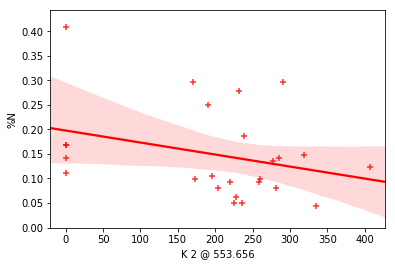

In [50]:
regplot = sns.regplot(data=df, x=str(elements[7]), y='%N', color='r', marker='+')

In [51]:
regplot.get_figure().savefig('fig.png')

In [73]:
def plot_calibrations(elements, path):
    for element in elements:
        regplot = sns.regplot(data=df, x=str(element), y='%N', color='r', marker='+')
        regplot.get_figure().savefig(os.path.join(path,'{}.png'.format(str(element))))
        plt.clf()

In [74]:
plot_calibrations(elements, '../output/calibration_plots')